# Práctico 1

## Objetivo general del práctico:

* Realizar una primera aproximación a Python y al documento-herramienta notebook (.ipynb)
* Presentar un proceso de aprendizaje a partir de un caso con datos de la realidad

## Caso de estudio:

1. Objetivo:

    * **Tarea (T)**: predecir si la persona asiste o no a un establecimiento de enseñanza
    * **Entrenamiento (E)**: utilizamos los datos de la Encuesta Continua de Hogares del INE (ECH)
        * *Atención: no se debe utilizar ninguna otra variable del bloque E.3 de la ECH (Educación)*
    * **Performance (P)**: buscamos minimizar el error de clasificación   


2. Links de referencia:

    * [Encuesta Continua de Hogares](https://anterior.ine.gub.uy/web/guest/encuesta-continua-de-hogares1) 
    * Datos a utilizar: [Bases ECH semestre 1](https://anterior.ine.gub.uy/c/document_library/get_file?uuid=48bf8f9d-ddaf-4b17-92cb-de4348925954&groupId=10181)
        * __Atención__: utilizamos el archivo ECH_01_22.csv
        
    
3. Entendimiento del caso:

    * Lectura de la documentación de los datos de la ECH
    * Análisis del diccionario de datos de la ECH
    * ¿Cuál es la variable objetivo *Y*?
    * Planteo inicial de hipótesis: 
        * Sesgo inductivo: tomamos como referencia "¿Qué es un ave?", vista en la primera sesión
        * ¿Cuáles atributos podríamos incluir como variables independientes *X*?



## Setup

* Importación de librerías

In [2]:
# Setup
import os # Obtener directorios de trabajo 

# Data munging
import numpy as np # Scientific computing (arreglos, matrices, funciones)
import pandas as pd # Análisis y manipulación de datos
import seaborn as sns # Visualización

* Seteo de directorio de trabajo
    - facilita el trabajo con direcciones relativas al directorio elegido
    - una buena práctica es setearlo en la raíz del proyecto que estamos trabajando, luego es fácil moverse a partir de allí

In [3]:
# Obtengo el directorio de trabajo actual
os.getcwd()

'/Users/sebassu/Documents/tecnicas-machine-learning/laboratorios/1'

In [4]:
# Seteo y verifico el directorio de trabajo en la raíz del proyecto
os.chdir(r'/Users/sebassu/Documents/tecnicas-machine-learning/laboratorios/1')
# Se incluye 'r' antes de la dirección para atender adecuadamente a los caracteres especiales

print('El nuevo -actual- directorio de trabajo es: ', os.getcwd())

El nuevo -actual- directorio de trabajo es:  /Users/sebassu/Documents/tecnicas-machine-learning/laboratorios/1


## Adquisición de los datos

* Para este caso, por ser de una sola vez, se realiza la descarga y guardado manual de los datos

## Importación de los datos

In [6]:
# import data (evitamos importar columna de índice del dataset original; el dataset tiene 143 columnas)
df = pd.read_csv(r'data/ECH_01_22.csv', usecols = range(1, 143))

## Análisis Exploratorio (EDA) y Transformación de variables

* Vemos los datos

In [7]:
df.head()

,ID,nper,anio,mes,GR,region,region_4,dpto,barrio,ccz,...,f123,f124_1,f124_2,f124_3,f124_5,POBPCOAC,SUBEMPLEO,niv_edu,w,ola
0,1899,1,2022,1,2,1,1,1,1,1,...,0,1,2,2,2,10,0,2. CB completo o EMS incomp,102,6
1,1899,2,2022,1,2,1,1,1,1,1,...,0,2,2,2,1,6,0,1. CB incompleto o menos,102,6
2,1900,1,2022,1,2,1,1,1,1,1,...,0,2,2,2,1,2,0,4. Terciario completo o posgrado,218,6
3,1900,2,2022,1,2,1,1,1,1,1,...,0,2,2,2,2,2,0,4. Terciario completo o posgrado,218,6
4,3847,1,2022,1,3,1,1,1,1,1,...,0,2,2,2,2,2,0,3. Sec. completa o terciaria incomp,235,5


In [8]:
columns = df.columns.values.tolist()
print(columns)

['ID', 'nper', 'anio', 'mes', 'GR', 'region', 'region_4', 'dpto', 'barrio', 'ccz', 'estred13', 'loc_agr_13', 'h2_cv', 'h4_1_cv', 'd23', 'd24', 'd25', 'e0_cv', 'e01_cv', 'e1_cv', 'e557', 'e558', 'e26', 'e27', 'e29_1', 'e29_2', 'e29_3', 'e29_4', 'e29_5', 'e29_5_1', 'e29_6', 'e49', 'e51_1', 'e51_2', 'e197_1', 'e51_3', 'e51_4_a', 'e201_1a', 'e51_4_b', 'e201_1b', 'e51_5', 'e201_1c', 'e51_6', 'e201_1d', 'e209_1', 'e51_6a', 'e51_6b', 'e214_1', 'e51_8', 'e215_1', 'e217_1', 'e51_9', 'e218_1', 'e220_1', 'e51_10', 'e221_1', 'e223_1', 'e51_11', 'e224_1', 'e226_1', 'f269', 'f270', 'f271', 'f272', 'f273', 'f69', 'f69_1', 'f274', 'f275', 'f275_1', 'f276', 'f277', 'f70', 'f304', 'f302', 'f303', 'f71_2', 'f72_2', 'f73', 'f82', 'f305', 'f306', 'f284_1', 'f284_2', 'f284_3', 'f284_4', 'f284_5', 'f284_6', 'f284_7', 'f85', 'f311', 'f309', 'f310', 'f90_2', 'f91_2', 'f92', 'f296_1', 'f296_2', 'f296_3', 'f296_4', 'f296_5', 'f296_6', 'f296_7', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f297', 'f298', 'f104'

* Vemos bajo qué tipo de objeto tenemos al dataset, nos interesa utilizar las funcionalidades de los DataFrame de pandas

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# Cantidad de filas del dataset, lo usaremos para ver proporciones
print('En un DataFrame, podemos obtener la cantidad de filas con la función len()',
      '-',
      len(df),
      '-',
      'o con .shape[]',
      '-',
      df.shape[0],
      '-.'
     )

En un DataFrame, podemos obtener la cantidad de filas con la función len() - 19588 - o con .shape[] - 19588 -.


In [11]:
# Cantidad de columnas del dataset
print('En un DataFrame, podemos obtener la cantidad de columnas con la función len() combinada con .columns',
      '-',
      len(df.columns),
      '-',
      'o con .shape[]',
      '-',
      df.shape[1],
      '-.'
     )

En un DataFrame, podemos obtener la cantidad de columnas con la función len() combinada con .columns - 142 - o con .shape[] - 142 -.


* Correspondencia entre observaciones e individuos (personas)

In [12]:
# Creamos un nuevo objeto para analizar correspondencia entre observaciones e individuos (personas)
df_personas = pd.DataFrame()
df_personas['id_persona'] = df['ID'].astype(str) + df['nper'].astype(str)
df_personas.describe()

,id_persona
count,19588
unique,19588
top,18991
freq,1


In [13]:
# ¿Cada observación corresponde a una persona?
if df_personas['id_persona'].count() == df_personas['id_persona'].nunique():
    print("Cada observación corresponde a una persona")
else:
    print("Revisar")

# Borramos objeto de prueba    
del(df_personas)

Cada observación corresponde a una persona


* Selección de variables de interés (a partir del Entendimiento del caso)

In [18]:
# Selección de variables sobre educación (según diccionario)

# Selección de columnas por nombre; creamos copia para no afectar al original
df_educ = df[['e49', 'e27', 'e26', 'f269']].copy()
df_educ.columns = ['asiste', 'edad', 'sexo', 'trabajo']

In [19]:
df_educ.head()

,asiste,edad,sexo,trabajo
0,1.0,81,1,2
1,1.0,73,1,2
2,1.0,32,2,1
3,1.0,30,1,1
4,1.0,33,1,2


In [20]:
id(df)

4847966288

In [22]:
id(df_educ)

4848713552

In [23]:
# Alternativa: creamos un DataFrame asignando el nuevo nombre de la columna a una Serie (cada columna del dataset original)
df_educ_alt = pd.DataFrame({'asiste': df['e49'],
                            'edad': df['e27'],
                            'sexo': df['e26'],
                            'trabajo': df['f269']})

In [24]:
df_educ_alt.head()

,asiste,edad,sexo,trabajo
0,1.0,81,1,2
1,1.0,73,1,2
2,1.0,32,2,1
3,1.0,30,1,1
4,1.0,33,1,2


In [25]:
# Alternativa: función .loc, Slice Notation (start:stop:step); con la función .iloc seleccionamos según posiciones
df_educ_alt = df.loc[:,['e49', 'e27', 'e26', 'f269']]
df_educ_alt.columns = ['asiste', 'edad', 'sexo', 'trabajo']

In [26]:
df_educ_alt.head()

,asiste,edad,sexo,trabajo
0,1.0,81,1,2
1,1.0,73,1,2
2,1.0,32,2,1
3,1.0,30,1,1
4,1.0,33,1,2


In [27]:
id(df_educ_alt)

4847227920

In [28]:
del(df_educ_alt)

In [29]:
df_educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   asiste   19585 non-null  float64
 1   edad     19588 non-null  int64  
 2   sexo     19588 non-null  int64  
 3   trabajo  19588 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 612.3 KB


* Datos faltantes

In [30]:
# Proporción de datos faltantes
df_educ.isnull().mean()

asiste     0.000153
edad       0.000000
sexo       0.000000
trabajo    0.000000
dtype: float64

* Asignación de tipo adecuado de variable (si corresponde)

In [31]:
df_educ['asiste'] = df_educ['asiste'].astype('category')
df_educ['sexo'] = df_educ['sexo'].astype('category')
df_educ['trabajo'] = df_educ['trabajo'].astype('category')
df_educ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   asiste   19585 non-null  category
 1   edad     19588 non-null  int64   
 2   sexo     19588 non-null  category
 3   trabajo  19588 non-null  category
dtypes: category(3), int64(1)
memory usage: 211.0 KB


* Análisis de la variable objetivo
    * Complementamos herramientas de pandas con entendimiento del diccionario de variables para decidir una transformación

In [32]:
df_educ['asiste'].describe()

count     19585.0
unique        4.0
top           1.0
freq      16439.0
Name: asiste, dtype: float64

In [34]:
df_educ['asiste'].value_counts()

asiste
1.0    16439
3.0     2982
2.0      154
0.0       10
Name: count, dtype: int64

In [35]:
pd.isnull(df_educ['asiste']).describe()

count     19588
unique        2
top       False
freq      19585
Name: asiste, dtype: object

* Transformación de la variable objetivo
    * Una alternativa para resolver nuestro problema puede ser transformar variables categóricas en booleanas, siempre que la variable tenga dos categorías o que se quiera reducir la cantidad de categorías a dos (y que esto sea adecuado al objetivo del problema).
    * Optamos por mantener la variable original y crear una nueva variable auxiliar transformada.

In [36]:
df_educ['aux_asiste'] = df_educ['asiste'].transform((lambda x: True if x == 3 else False))
df_educ['aux_asiste'].describe()

count     19585
unique        2
top       False
freq      16603
Name: aux_asiste, dtype: object

In [37]:
# boolean indexing: permite hacer lo mismo de arriba, sin usar función
df_pba = pd.DataFrame()
df_pba['aux_asiste'] = df_educ['asiste'] == 3
df_pba

,aux_asiste
0,False
1,False
2,False
3,False
4,False
...,...
19583,True
19584,False
19585,False
19586,False


In [38]:
del(df_pba)

* Visualización de la variable objetivo y variables independientes categóricas
    * Trabajamos con proporciones

In [39]:
df_educ.groupby(['sexo', 'aux_asiste'])['asiste'].count()/len(df_educ.index)

sexo  aux_asiste
1     False         0.390086
      True          0.063764
2     False         0.457525
      True          0.088473
Name: asiste, dtype: float64

<Axes: xlabel='sexo'>

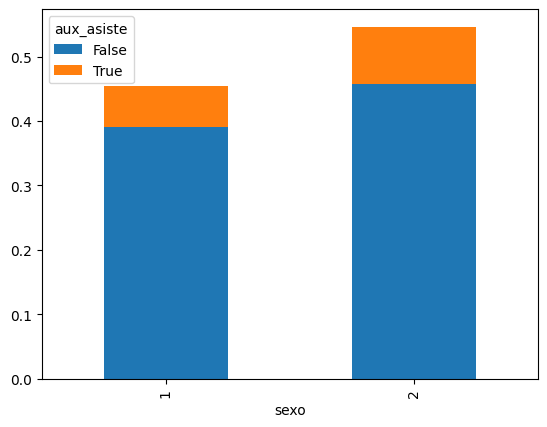

In [40]:
sexo_prop = pd.crosstab(df_educ.sexo, df_educ.aux_asiste)/len(df_educ)
sexo_prop.plot(kind='bar', stacked=True)

<Axes: xlabel='sexo'>

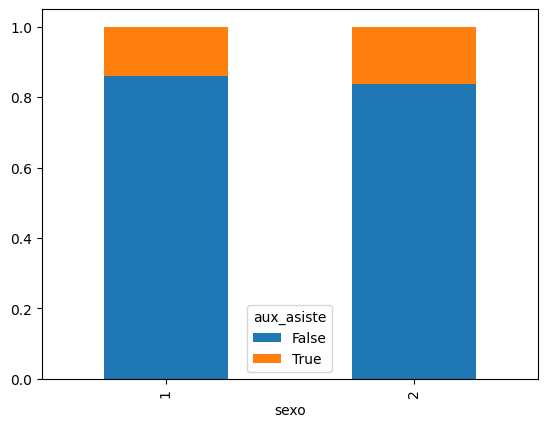

In [41]:
sexo_prop_relat = sexo_prop.div(sexo_prop.sum(1).astype(float), axis=0)
sexo_prop_relat.plot(kind='bar', stacked=True)

<Axes: xlabel='trabajo'>

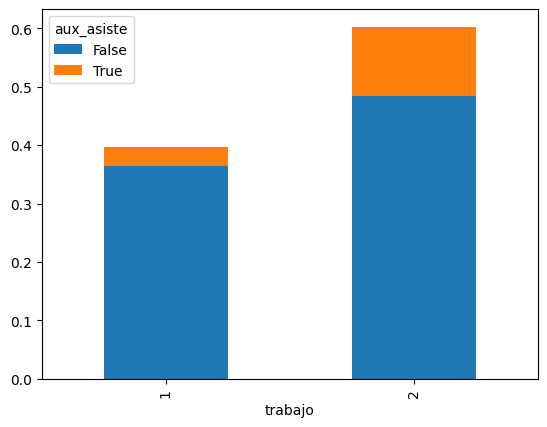

In [42]:
trabajo_prop = pd.crosstab(df_educ.trabajo, df_educ.aux_asiste)/len(df_educ)
trabajo_prop.plot(kind='bar', stacked=True)

<Axes: xlabel='trabajo'>

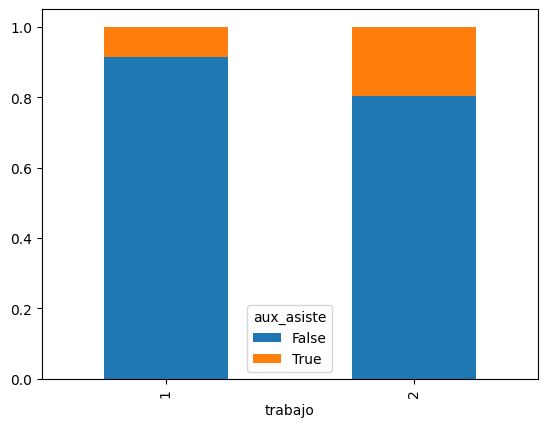

In [43]:
trabajo_prop_relat = trabajo_prop.div(trabajo_prop.sum(1).astype(float), axis=0)
trabajo_prop_relat.plot(kind='bar', stacked=True)

* Visualización de la variable objetivo y variables independientes continuas

In [36]:
df_educ.groupby("aux_asiste").aggregate(func=["min", "median", "max"])

edad            
            min median  max
aux_asiste                 
False        14   53.0  110
True         14   19.0   77

<Axes: title={'center': 'edad'}, xlabel='[aux_asiste]'>

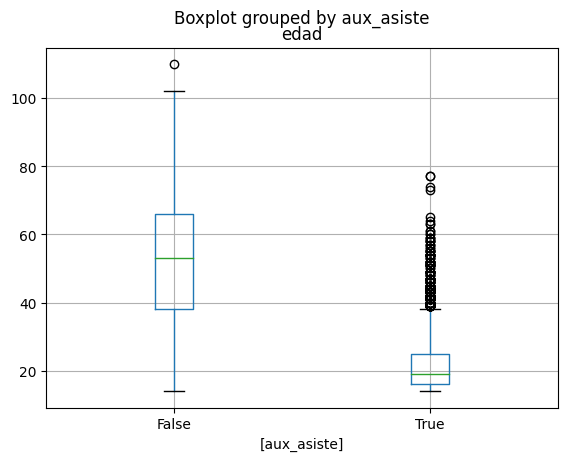

In [71]:
df_educ.boxplot(column=['edad'], by=['aux_asiste'])

* Transformaciones de variables independientes

    * Una alternativa para resolver nuestro problema puede ser transformar variables categóricas en booleanas, siempre que la variable tenga dos categorías o que se quiera reducir la cantidad de categorías a dos (nota: con más de dos categorías, también tenemos la posibilidad de realizar la transformación One-Hot, que veremos en futuros prácticos).
    * Optamos por mantener las variables originales y crear nuevas variables auxiliares transformadas.

In [47]:
df_educ['sexo_mujer'] = np.where(df_educ['sexo'] == 2, True, False)
df_educ['no_trabaja'] = np.where(df_educ['trabajo'] == 2, True, False)

In [48]:
df_educ.head()

,asiste,edad,sexo,trabajo,aux_asiste,sexo_mujer,no_trabaja
0,1.0,81,1,2,False,False,True
1,1.0,73,1,2,False,False,True
2,1.0,32,2,1,False,True,False
3,1.0,30,1,1,False,False,False
4,1.0,33,1,2,False,False,True


In [49]:
df_educ.columns

Index(['asiste', 'edad', 'sexo', 'trabajo', 'aux_asiste', 'sexo_mujer',
       'no_trabaja'],
      dtype='object')

In [50]:
df_educ.describe()

,edad
count,19588.000000
mean,47.805289
std,20.321829
min,14.000000
25%,30.000000
50%,48.000000
75%,64.000000
max,110.000000


In [51]:
df_educ['aux_asiste'].describe()

count     19585
unique        2
top       False
freq      16603
Name: aux_asiste, dtype: object

In [52]:
df_educ['sexo_mujer'].describe()

count     19588
unique        2
top        True
freq      10696
Name: sexo_mujer, dtype: object

In [53]:
df_educ['no_trabaja'].describe()

count     19588
unique        2
top        True
freq      11800
Name: no_trabaja, dtype: object

## Construcción del Concepto: Entrenamiento

* Definimos y aplicamos sesgo inductivo e hipótesis para cumplir con la tarea
* Entrenamiento: utilizamos todos las observaciones del dataset

In [56]:
# Dataframe vacío para crear hipótesis
H = pd.DataFrame()
H['aux_asiste'] = df_educ['aux_asiste']

In [57]:
# Primeras hipótesis
H['h_1'] = np.where(df_educ['edad'] < 25, True, False) # con función np.where
H['h_1.1'] = df_educ['edad'] < 25 # boolean indexing

# operadores lógicos and, or
H['h_2'] = np.where((df_educ['edad'] < 25) & (df_educ['sexo_mujer'] == True), True, False)
H['h_2.1'] = (df_educ['edad'] < 25) & (df_educ['sexo_mujer'] == True)

H['h_3'] = np.where((df_educ['edad'] < 25) | (df_educ['sexo_mujer'] == True), True, False)

# Alternativa: np.logical_and, np.logical_or
H['h_2.2'] = np.where(np.logical_and(df_educ['edad'] < 25, df_educ['sexo_mujer'] == True), True, False)
H['h_3.1'] = np.where(np.logical_or(df_educ['edad'] < 25, df_educ['sexo_mujer'] == True), True, False)

H['h_4'] = np.where((df_educ['edad'] < 25) & (df_educ['no_trabaja'] == False), True, False)

In [58]:
H.head()

,aux_asiste,h_1,h_1.1,h_2,h_2.1,h_3,h_2.2,h_3.1,h_4
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


## Construcción del Concepto: Performance

In [59]:
H['error_1'] = np.where(H['aux_asiste'] != H['h_1'], True, False)
H['error_1.1'] = np.where(H['aux_asiste'] != H['h_1.1'], True, False)
H['error_2'] = np.where(H['aux_asiste'] != H['h_2'], True, False)
H['error_2.1'] = np.where(H['aux_asiste'] != H['h_2.1'], True, False)
H['error_2.2'] = np.where(H['aux_asiste'] != H['h_2.2'], True, False)
H['error_3'] = np.where(H['aux_asiste'] != H['h_3'], True, False)
H['error_3.1'] = np.where(H['aux_asiste'] != H['h_3.1'], True, False)
H['error_4'] = np.where(H['aux_asiste'] != H['h_4'], True, False)

In [72]:
H.head()

,aux_asiste,h_1,h_1.1,h_2,h_2.1,h_3,h_2.2,h_3.1,h_4,error_1,error_1.1,error_2,error_2.1,error_2.2,error_3,error_3.1,error_4
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
# Como True es igual a 1, False es 0:
H['error_1'].mean()

0.09847866040432918

In [62]:
H['error_1.1'].mean()

0.09847866040432918

In [63]:
H['error_2'].mean()

0.114815192975291

In [64]:
H['error_2.1'].mean()

0.114815192975291

In [65]:
H['error_2.2'].mean()

0.114815192975291

In [66]:
H['error_3'].mean()

0.5051051664284255

In [67]:
H['error_3.1'].mean()

0.5051051664284255

In [68]:
H['error_4'].mean()

0.16765366550949562